# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default="svg"

# 2. Importing dataset

In [2]:
df = pd.read_csv('E:\Senthil\AI\Data science\Assignment\Zomato_Chennai_Listing_2020.csv')
df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [3]:
df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [4]:
df.shape

(12032, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


# Cleaning the Dataset

## a. working on Delivery Rating Count

In [7]:
df.replace({'Delivery Rating Count': {'Does not offer Delivery': 0}}, inplace=True)
df.replace({'Delivery Rating Count': {'Not enough Delivery Reviews': 0}}, inplace=True)

In [8]:
df.fillna(({'Delivery Rating Count':0}), inplace=True)

In [9]:
df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,0,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,0,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,0,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,0,"['Breakfast', 'Delivery Only']"


In [10]:
df.replace({'Dining Rating Count': {'Does not offer Dining': 0}}, inplace=True)
df.replace({'Dining Rating Count': {'Not enough Dining Reviews': 0}}, inplace=True)
df.fillna(({'Dining Rating Count':0}), inplace=True)

In [11]:
df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count         0
Delivery Rating          5851
Delivery Rating Count       0
Features                    0
dtype: int64

In [12]:
# Checking for text values in the column before converting it to numeric datatype
df['Dining Rating'].value_counts()
df['Dining Rating Count'].value_counts()
df['Delivery Rating'].value_counts()
df['Delivery Rating Count'].value_counts()

Delivery Rating Count
0       5851
27        34
37        30
32        30
40        30
        ... 
1049       1
734        1
5816       1
664        1
1617       1
Name: count, Length: 2280, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [14]:
# Changing Data Type of the numerical columns
df['Price for 2'] = df['Price for 2'].astype('int64')
df['Dining Rating Count'] = df['Dining Rating Count'].astype('int64')
df['Delivery Rating'] = df['Delivery Rating'].astype('float64')
df['Delivery Rating Count'] = df['Delivery Rating Count'].astype('int64')

In [15]:
df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350,NaN,0,NaN,0,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350,NaN,0,NaN,0,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350,NaN,0,NaN,0,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350,NaN,0,NaN,0,"['Breakfast', 'Delivery Only']"


In [16]:
# Finding those restaurant whose has 0 Rating or Votes
useless_Dining_data = (df['Dining Rating'] == 0.0) | (df['Dining Rating Count'] == 0)
df[useless_Dining_data]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,https://www.zomato.com/chennai/bai-veetu-kalya...,Bai Veetu Kalyanam,"1/187, Thalambur Road, Navallur, Chennai",Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350,NaN,0,4.3,1061,['Home Delivery']
77,https://www.zomato.com/chennai/al-dhareeq-beef...,Al Dhareeq Beef Biriyani,"64/A, 162, Sivan Kovil South Street, Kodambak...",Kodambakkam,['Biryani'],['Beef Biryani'],300,NaN,0,3.9,19600,['Home Delivery']
106,https://www.zomato.com/chennai/twilight-take-o...,Twilight Take Out,"1, Park Side Street, Lake Area, Nungambakkam,...",Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350,NaN,0,4.0,11200,"['Home Delivery', 'Free Parking']"
107,https://www.zomato.com/chennai/the-red-box-ann...,The Red Box,"Flat 51/C, Shanthi Colony Main Road, Anna Nag...",Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200,NaN,0,4.2,11500,['Home Delivery']
114,https://www.zomato.com/chennai/charminar-biriy...,Charminar Biriyani Centre,"91, Dr. Besant Road, Near Meesapet Market, Ro...",Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300,NaN,0,3.9,652,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350,NaN,0,NaN,0,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350,NaN,0,NaN,0,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350,NaN,0,NaN,0,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350,NaN,0,NaN,0,"['Breakfast', 'Delivery Only']"


In [17]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
df = df[~useless_Dining_data]

In [18]:
# Checking all the values correctly mapped
df['Location'].value_counts()

Location
Porur                                       209
T. Nagar                                    188
Velachery                                   186
Anna Nagar East                             180
Ambattur                                    174
                                           ... 
Novotel Chennai, OMR                          1
IBIS Hotel, Old Mahabalipuram Road (OMR)      1
Eat And Pack, Ambattur                        1
The Pride Hotel, Kilpauk                      1
Chandra Metro Mall, Virugambakkam             1
Name: count, Length: 264, dtype: int64

In [19]:
# Removing the irrelevant text from the Region column
df.loc[:, 'Location'] = df['Location'].str.replace('[a-zA-Z].+-- ','',regex=True)

In [20]:
df['Location'].value_counts()

Location
Porur                                       209
T. Nagar                                    188
Velachery                                   186
Anna Nagar East                             180
Ambattur                                    174
                                           ... 
Novotel Chennai, OMR                          1
IBIS Hotel, Old Mahabalipuram Road (OMR)      1
Eat And Pack, Ambattur                        1
The Pride Hotel, Kilpauk                      1
Chandra Metro Mall, Virugambakkam             1
Name: count, Length: 264, dtype: int64

In [21]:
# Finding all the duplicate rows
df[df.duplicated()]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [22]:
df.loc[:, 'Top Dishes'] = df['Top Dishes'].str.replace(r"[\[\]']",'', regex=True)
df.loc[:,'Cuisine'] = df['Cuisine'].str.replace(r"[\[\]]", "", regex=True)

In [23]:
Zomato_Chennai=df.copy()

In [24]:
Zomato_Chennai.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,'Biryani',"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",Zinger Burger,500,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


# Performing Exploratory Data Analysis¶

## Top 20 restaurants are in Chennai?

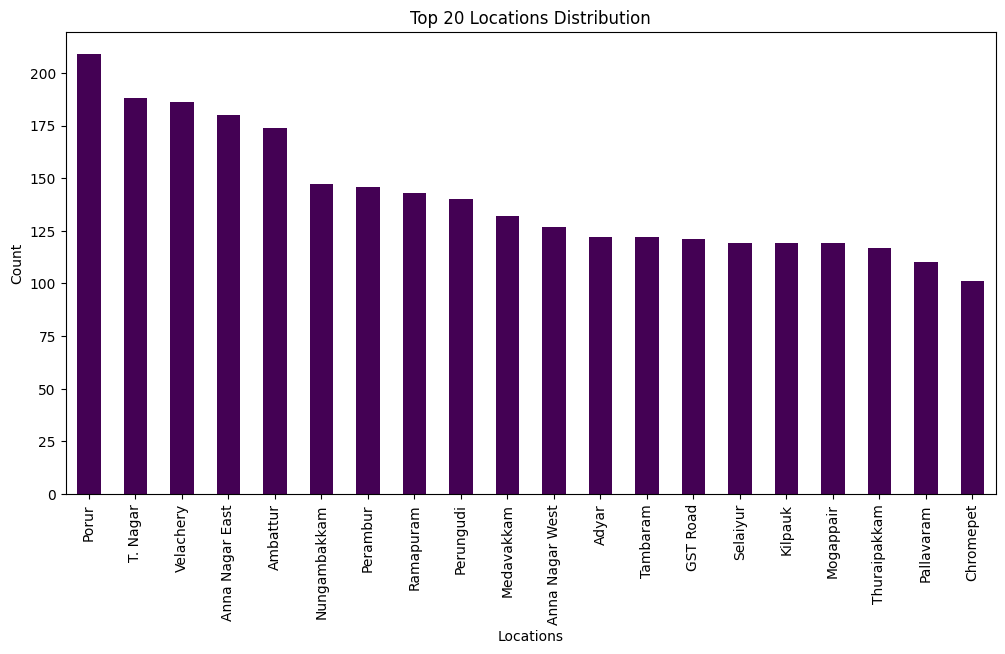

In [25]:
location_counts = Zomato_Chennai['Location'].value_counts()
top_locations = location_counts[:20]
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', colormap='viridis')
plt.xlabel("Locations")
plt.ylabel("Count")
plt.title("Top 20 Locations Distribution")

plt.show()

## What are the percentage of restaurants by Delivery Rating Type in chennai?

In [26]:
rating_type_df = Zomato_Chennai['Delivery Rating'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'RATING', 'count':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

,Delivery Rating,COUNT OF RESTAURANTS
0,3.9,939
1,3.8,530
2,4.0,437
3,3.7,411
4,4.1,356
5,3.6,329
6,4.2,302
7,3.5,220
8,4.3,219
9,3.4,169


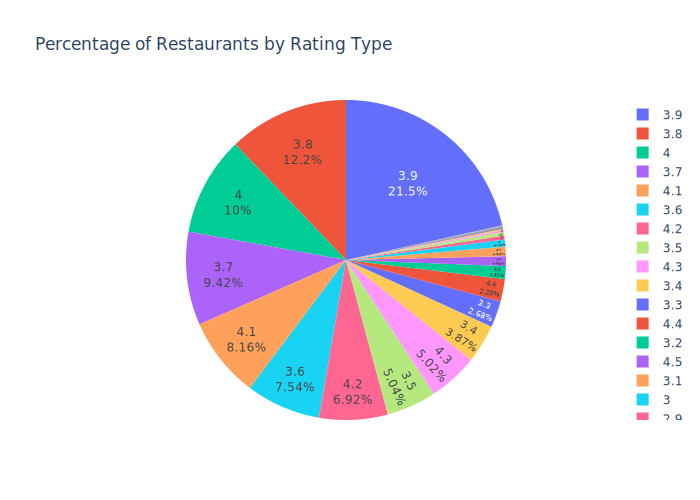

In [27]:
fig = px.pie(rating_type_df, names='Delivery Rating', values='COUNT OF RESTAURANTS', color='Delivery Rating',
title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Which are the Top 10 highest rated Briyani Restaurant in Chennai?

In [28]:
briyani_df = Zomato_Chennai[Zomato_Chennai['Top Dishes'].str.contains('Briyani', case=False, na=False, regex=True)]
briyani_df.sort_values(by='Dining Rating Count', ascending=False).head(30)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


## Which places have the highest rated restaurant for each Cuisine Type in Chennai?

In [29]:
highest_rated_df = Zomato_Chennai[Zomato_Chennai['Delivery Rating Count'] >= 4.5]
highest_rated_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,'Biryani',"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",Zinger Burger,500,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
11666,https://www.zomato.com/chennai/juice-world-ala...,Juice World,"85A, Ground Floor, Railway Station Road, Alan...",Alandur,"'Beverages', ' Fast Food'",Invalid,300,2.0,4,3.9,42,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
11667,https://www.zomato.com/chennai/juice-world-pal...,Juice World,"2/182, Periyar Road, Palavakkam, Chennai",Palavakkam,"'Beverages', ' Fast Food'",Invalid,300,2.0,4,3.9,48,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
11736,https://www.zomato.com/chennai/adyar-vaishnava...,Adyar Vaishnavas Thattu Idly Kadai,"3/103, Mugalivakkam Main Road, Madanandapuram...",Porur,"'South Indian', ' Sandwich', ' Chinese', ' Str...",Invalid,200,3.2,6,3.9,48,"['Home Delivery', 'Indoor Seating']"
11785,https://www.zomato.com/chennai/engineers-kitch...,Engineers Kitchen,"24 A, AIC Colony, Athipet, Ambattur, Chennai",Ambattur,"'North Indian', ' Chinese', ' Andhra'",Invalid,400,2.5,6,3.5,214,"['Home Delivery', 'Indoor Seating']"


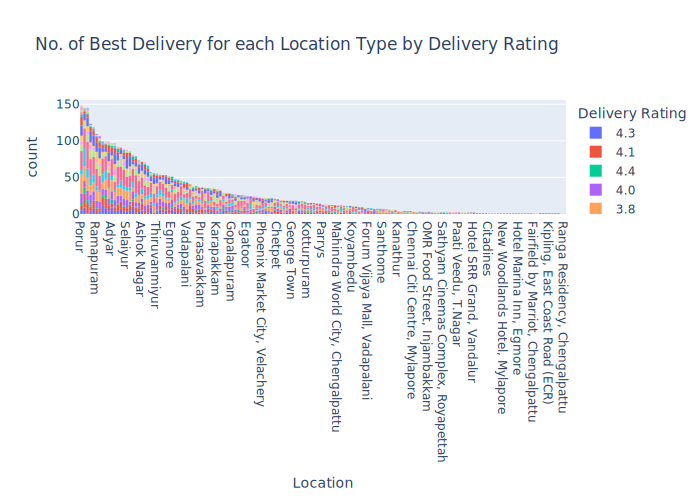

In [30]:
fig.update_layout(width=2000, height=1000)
fig = px.histogram(highest_rated_df, x='Location', color='Delivery Rating',
title= 'No. of Best Delivery for each Location Type by Delivery Rating').update_xaxes(categoryorder="total descending")
fig.show()